In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from dask.delayed import delayed
import matplotlib.pyplot as plt

In [2]:
src='data/dataset.parquet.gz'
df = pd.read_parquet(src)

In [3]:
df.columns

Index(['date', 'num_claims', 'cit_received', 'cit_made', 'originality',
       'generality', 'wipo_field_id', 'wipo_sector_id', 'external',
       'far_external', 'pagerank'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32836551 entries, 000004 to pctus9926473
Data columns (total 11 columns):
 #   Column          Dtype   
---  ------          -----   
 0   date            float64 
 1   num_claims      float64 
 2   cit_received    float64 
 3   cit_made        float64 
 4   originality     float64 
 5   generality      float64 
 6   wipo_field_id   category
 7   wipo_sector_id  category
 8   external        float64 
 9   far_external    float64 
 10  pagerank        object  
dtypes: category(2), float64(8), object(1)
memory usage: 2.5+ GB


CPU times: user 813 ms, sys: 187 ms, total: 1 s
Wall time: 1.03 s


<AxesSubplot:>

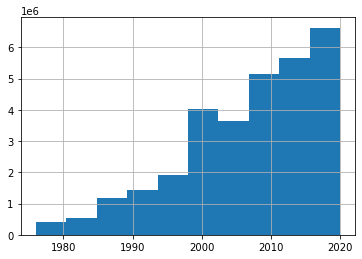

In [6]:
%%time
df['date'].hist()

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'num_claims'}>,
        <AxesSubplot:title={'center':'cit_received'}>],
       [<AxesSubplot:title={'center':'cit_made'}>,
        <AxesSubplot:title={'center':'originality'}>,
        <AxesSubplot:title={'center':'generality'}>],
       [<AxesSubplot:title={'center':'external'}>,
        <AxesSubplot:title={'center':'far_external'}>, <AxesSubplot:>]],
      dtype=object)

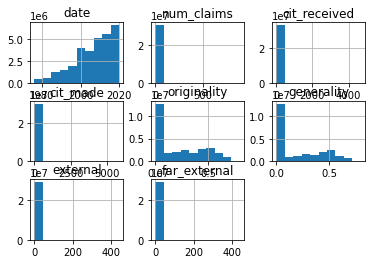

In [15]:
df.hist()

In [16]:
src='data/cleanpatent.parquet.gz'
df = pd.read_parquet(src)

In [17]:
df.describe()

,date,num_claims
count,7.430873e+06,7.430873e+06
mean,2.004755e+03,1.424143e+01
std,1.185321e+01,1.164018e+01
min,1.976000e+03,1.000000e+00
25%,1.997000e+03,6.000000e+00
50%,2.008000e+03,1.300000e+01
75%,2.015000e+03,2.000000e+01
max,2.020000e+03,8.870000e+02


<AxesSubplot:>

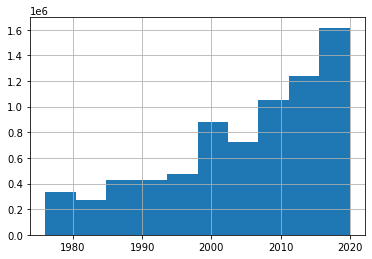

In [19]:
df.date.hist()

In [ ]:
src='data/cleanpatent.parquet.gz'
df = pd.read_parquet(src)